# Demo for  "First Order Motion Model for Facial-Expression-Transfer"

**Install dependencies**

In [4]:
!pip install ipyplot

**Clone repository**

In [1]:
!git clone -b Facial-Expression-Transfer https://github.com/diana-corona/first-order-model.git 

Cloning into 'first-order-model'...
remote: Enumerating objects: 349, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 349 (delta 25), reused 21 (delta 5), pack-reused 290
Receiving objects: 100% (349/349), 72.18 MiB | 12.84 MiB/s, done.
Resolving deltas: 100% (174/174), done.


**Move to repository**

In [2]:
cd first-order-model

/content/first-order-model


**Mount your Google drive folder on Colab**

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Add folder https://drive.google.com/drive/folders/1kZ1gCnpfU0BnpdU47pLM_TQ6RypDDqgw?usp=sharing  to your google drive.
Alternativelly you can use this mirror link https://drive.google.com/drive/folders/16inDpBRPT1UC0YMGMX3dKvRnOUsf5Dhn?usp=sharing**

**Load driving and source image**


        WARNING! Google Colab Environment detected!
        You might encounter issues while running in Google Colab environment.
        If images are not displaying properly please try setting `base_64` param to `True`.
        



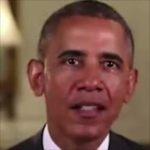
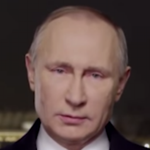


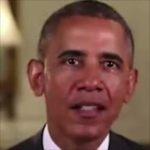
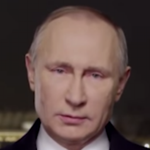

<Figure size 576x432 with 0 Axes>

In [5]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from skimage.transform import resize
import ipyplot
import warnings

warnings.filterwarnings("ignore")

source_image = imageio.imread('/content/gdrive/My Drive/first-order-motion-model/00.png')
driving_image = imageio.imread('/content/gdrive/My Drive/first-order-motion-model/02.png')


#Resize image and video to 256x256

source_image = resize(source_image, (256, 256))[..., :3]

driving_image = resize(driving_image, (256, 256))[..., :3]

def display(source, reader, generated=None):
    fig = plt.figure(figsize=(8 + 4 * (generated is not None), 6))

    cols = [source]
    cols.append(driving_image)
    if generated is not None:

      generated = resize(generated, (256, 256))[..., :3]
      cols.append(generated)

    return cols

ipyplot.plot_images(display(source_image,driving_image), max_images=2, img_width=150)

**Create a model and load checkpoints**

In [6]:
from demo import load_checkpoints
generator, kp_detector = load_checkpoints(config_path='config/vox-256.yaml', 
                            checkpoint_path='/content/gdrive/My Drive/first-order-motion-model/vox-cpk.pth.tar')

**Perform image facial expression transfer using relative keypoints**


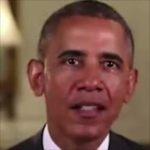
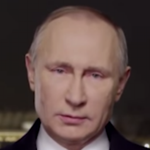
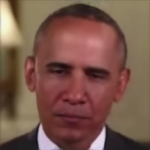


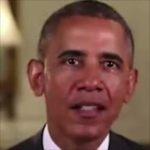
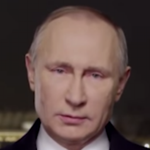
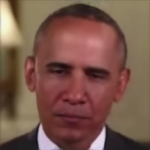

<Figure size 864x432 with 0 Axes>

In [9]:
from demo import make_single_transformation
from skimage import img_as_ubyte

prediction = make_single_transformation(source_image, driving_image, generator, kp_detector, relative=True)

ipyplot.plot_images(display(source_image,driving_image,prediction), max_images=3, img_width=150)

**Perform image facial expression transfer using absolute keypoints**


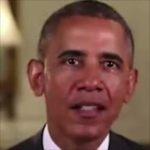
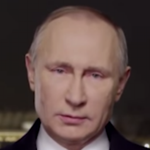
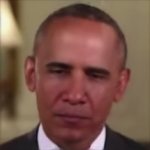


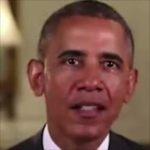
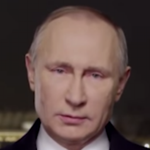
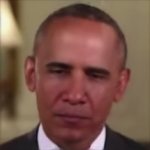

<Figure size 864x432 with 0 Axes>

In [10]:
prediction = make_single_transformation(source_image, driving_image, generator, kp_detector, relative=False)

ipyplot.plot_images(display(source_image,driving_image,prediction), max_images=3, img_width=150)


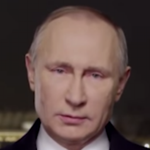
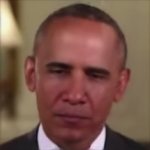
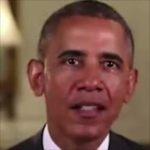


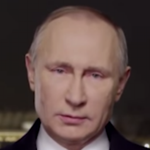
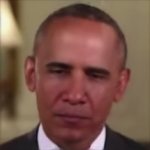
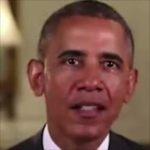

<Figure size 864x432 with 0 Axes>

In [13]:
ipyplot.plot_class_representations(display(source_image,driving_image,prediction),['source','driving','result'], img_width=150)

**Save prediction**

In [ ]:
from PIL import Image
imageName = "your_file.jpeg"
im = Image.fromarray(prediction)
im.save(imageName)